In [1]:
import pandas as pd

In [42]:
def get_labels(ds):
    if ds == 'crema' or ds == 'crema_no_aug':
        label_list = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
    elif ds == 'bser' or ds == 'bser_no_aug':
        label_list = ['angry', 'happy', 'neutral', 'sad', 'surprise']
    else:
        label_list = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    return label_list

In [84]:
df = pd.read_csv('./aug_comparison.csv')
df = df.drop(columns=['Weighted_Precision', 'Weighted_Precision_aug', 'Weighted_Recall', 'Weighted_Recall_aug'])
df['Dataset'] = df['Dataset'].apply(lambda x: x.replace('_', ' '))
df = df.rename(columns={
    'Accuracy_aug': '\\textbf{Acc. Aug.}',
    'Weighted_F1_aug': '\\textbf{WF1 Aug.}',
    'Macro_F1_aug': '\\textbf{MF1 Aug.}',
    'Accuracy': '\\textbf{Acc.}',
    'Weighted_F1': '\\textbf{WF1}',
    'Macro_F1': '\\textbf{MF1}',
    'Dataset': '\\textbf{Dataset}'})

df = df.applymap(lambda x: '$\\times$' if x == 0 else x)
df = df.applymap(lambda x: str(round(x*100, 2)) if not isinstance(x, str)  else x)
df
df.style.hide(axis='index').to_latex(
    './tables/aug_comparison.tex',
    position='h',
    position_float='centering',
    hrules=True,
    caption='HuBERT Accuracy, Weighted F1, Macro F1 with and without Augmentation',
    label='tab:hubert',
    column_format='{|c|c|c|c|c|c|c|}')

with open('./tables/aug_comparison.tex', 'r') as f:
    lines = f.read()
with open('./tables/aug_comparison.tex', 'w') as f:
    lines = lines.replace('\\toprule', '\\hline')
    lines = lines.replace('\\midrule', '\\hline')
    lines = lines.replace('\\bottomrule', '\\hline')
    f.write(lines)

In [32]:
df.to_latex('./tables/res',index=False)

/tmp/ipykernel_21639/3023005266.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex('./tables/res',index=False)


In [103]:
df = pd.read_csv('./bser.csv')
df = df[:-3]
df['Emotion_Class'] = df['Emotion_Class'].apply(lambda x: x.capitalize())
supp = df['Support']
df = df.rename(columns= {
    'Emotion_Class': '\\textbf{Emotion}',
    'F1_Score': '\\textbf{F1}',
    'Precision': '\\textbf{Precision}',
    'Recall': '\\textbf{Recall}',
    'Support': '\\textbf{Support}'
})
df = df.applymap(lambda x: str(round(x*100, 2)) if not isinstance(x, str) else x)
df['\\textbf{Support}'] = supp
df.style.hide(axis='index').to_latex(
    './tables/bser.tex',
    position='h',
    position_float='centering',
    hrules=True,
    caption='bruh',
    label='tab:test',
    column_format='{|c|c|c|c|c|c|c|}')
with open('./tables/bser.tex', 'r') as f:
    lines = f.read()
with open('./tables/bser.tex', 'w') as f:
    lines = lines.replace('\\toprule', '\\hline')
    lines = lines.replace('\\midrule', '\\hline')
    lines = lines.replace('\\bottomrule', '\\hline')
    f.write(lines)
df

,\textbf{Emotion},\textbf{Precision},\textbf{Recall},\textbf{F1},\textbf{Support}
0,Angry,86.89,85.48,86.18,62
1,Happy,78.79,85.25,81.89,61
2,Neutral,84.44,77.55,80.85,49
3,Sad,75.81,77.05,76.42,61
4,Surprise,86.67,85.25,85.95,61


In [110]:
import os

for dirname, _, files in os.walk('./'):
    for file in files:
        if file.endswith('.csv') and not file.startswith('aug'):
            path = os.path.join(dirname, file)
            print(path)
            filename = file.split('.')[0]
            filenameCaption = filename.replace('_', ' ')
            df = pd.read_csv(path)
            df = df[:-3]
            df['Emotion_Class'] = df['Emotion_Class'].apply(lambda x: x.capitalize())
            supp = df['Support']
            df = df.rename(columns= {
                'Emotion_Class': '\\textbf{Emotion}',
                'F1_Score': '\\textbf{F1}',
                'Precision': '\\textbf{Precision}',
                'Recall': '\\textbf{Recall}',
                'Support': '\\textbf{Support}'
            })
            df = df.applymap(lambda x: str(round(x*100, 2)) if not isinstance(x, str) else x)
            df['\\textbf{Support}'] = supp

            if filename.endswith('aug'):
                caption = f'HuBERT Classification Report on {filenameCaption[:-4].upper()} Dataset with Augmentation'
            else:
                caption = f'HuBERT Classification Report on {filenameCaption.upper()} Dataset'

            df.style.hide(axis='index').to_latex(
                f'./tables/{filename}.tex',
                position='h',
                position_float='centering',
                hrules=True,
                caption=caption,
                label=f'tab:hubert_{filename}',
                column_format='{|c|c|c|c|c|}')

            with open(f'./tables/{filename}.tex', 'r') as f:
                lines = f.read()
            with open(f'./tables/{filename}.tex', 'w') as f:
                lines = lines.replace('\\toprule', '\\hline')
                lines = lines.replace('\\midrule', '\\hline')
                lines = lines.replace('\\bottomrule', '\\hline')
                f.write(lines)


./savee.csv
./ravdess.csv
./bser_aug.csv
./tess.csv
./all_bn_aug.csv
./subesco.csv
./crema.csv
./bser.csv
./savee_aug.csv
./ravdess_aug.csv
./all_aug.csv
./all_bal.csv
./tess_aug.csv
./all_en_aug.csv
./crema_aug.csv
./subesco_aug.csv


In [109]:
lines = ''

for dir, _, files in os.walk('./tables/'):
    for file in files:
        path = os.path.join(dir, file)
        with open(path, 'r') as f:
            lines += f.read() + '\n'

with open('./tables/all_tables.tex', 'w') as f:
    f.write(lines)

In [34]:
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

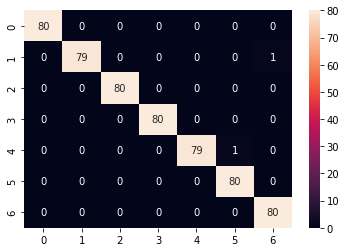

In [40]:
test= """
[[80  0  0  0  0  0  0]
 [ 0 79  0  0  0  0  1]
 [ 0  0 80  0  0  0  0]
 [ 0  0  0 80  0  0  0]
 [ 0  0  0  0 79  1  0]
 [ 0  0  0  0  0 80  0]
 [ 0  0  0  0  0  0 80]]
 """

test = test.strip()
test = re.sub(' +', ',', test)
test = re.sub('\[,', '[', test)
test = re.sub('\\n', '', test)
test
test = np.array(eval(test))
sns.heatmap(test, annot=True)

In [63]:
def save_cm(name, cm, aug=False):

    cm = cm.strip()
    cm = re.sub(' +', ',', cm)
    cm = re.sub('\[,', '[', cm)
    cm = re.sub('\\n', '', cm)
    cm = np.array(eval(cm))
    cm_n = cm / cm.astype(float).sum(axis=1)

    label_names = get_labels(name)

    ax= plt.subplot()
    plt.tight_layout()
    sns.heatmap(cm_n, annot=True, fmt='.2g', ax=ax)

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    title = f'HuBERT on {name.upper()} Dataset'
    if aug:
        title += ' with Augmentation'

    ax.set_title(title)
    ax.xaxis.set_ticklabels(label_names)
    ax.yaxis.set_ticklabels(label_names)

    filename = f'{name}'
    if aug:
        filename += '_aug'

    plt.savefig(f'../Hubert/cm/{filename}', dpi=150)

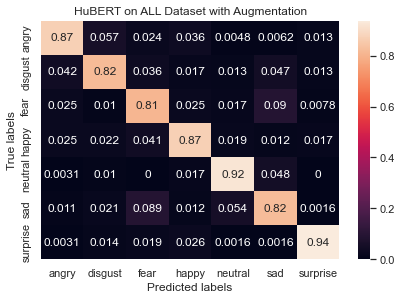

In [80]:
name = 'all'
aug = True
# aug = False

cm= """
[[561  33  14  23   3   4   8]
 [ 27 479  21  11   8  30   8]
 [ 16   6 472  16  11  58   5]
 [ 16  13  24 563  12   8  11]
 [  2   6   0  11 579  31   0]
 [  7  12  52   8  34 531   1]
 [  2   8  11  17   1   1 599]]
 """

save_cm(name, cm, aug=aug)

In [ ]:
tess_aug = np.array([[80,0,0,0,0,0,0],
 [ 0 79  0  0  0  0  1],
 [ 0  0 80  0  0  0  0],
 [ 0  0  0 80  0  0  0],
 [ 0  0  0  0 79  1  0],
 [ 0  0  0  0  0 80  0],
 [ 0  0  0  0  0  0 80]])

tess = np.array(

)

ravdess_aug = np.array(

)

ravdess = np.array(

)

savee_aug = np.array(

)

savee = np.array(

)

crema_aug = np.array(

)

crema = np.array(

)

subesco_aug = np.array(

)

subesco = np.array(

)

bser_aug = np.array(

)

bser = np.array(

)

all_en = np.array(

)

all_bn = np.array(

)

all = np.array(

)